In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
df = pd.read_csv('Academic-Performance-Dataset.csv')

In [3]:
print("------------------Shape of Dataset------------------")
print(df.shape)
print("\n")

------------------Shape of Dataset------------------
(20, 12)




In [4]:
print("-----------------Data Types in Dataset-----------------")
print(df.dtypes)
print("\n")

-----------------Data Types in Dataset-----------------
Rollno           int64
Name            object
Gender          object
Branch          object
Attendence     float64
Phy_marks      float64
Che_marks      float64
EM1_marks      float64
PPS_marks      float64
SME_marks      float64
Total Marks      int64
Percentage     float64
dtype: object




In [5]:
print("=====================Data Cleanning===================\n")

=====================Data Cleanning===================



In [6]:
print("-------------Handling Missing Values in Dataset-------------")
print(df.isnull().sum())
print("\n")

-------------Handling Missing Values in Dataset-------------
Rollno         0
Name           2
Gender         0
Branch         0
Attendence     0
Phy_marks      1
Che_marks      3
EM1_marks      2
PPS_marks      1
SME_marks      0
Total Marks    0
Percentage     0
dtype: int64




In [7]:
print("--------------List of name of columns with missing values--------------")
cols_with_missing = df.columns[df.isnull().any()]
print(cols_with_missing)
print("\n")

--------------List of name of columns with missing values--------------
Index(['Name', 'Phy_marks', 'Che_marks', 'EM1_marks', 'PPS_marks'], dtype='object')




In [8]:
print("-------------Filling Missing Values with Mean/Mode Imputation-------------")
for col in cols_with_missing:
    col_dt = df[col].dtype
    if col_dt in ['int64', 'float64']:
        outliers = (df[col] < 0) | (df[col] > 100)
        df.loc[outliers, col] = np.nan
        df[col] = df[col].fillna(df[col].mean())
    else:
        df[col] = df[col].ffill()
print(df.head())
print("\n")

-------------Filling Missing Values with Mean/Mode Imputation-------------
   Rollno      Name Gender Branch  Attendence  Phy_marks   Che_marks  \
0       1  Mohammed      M   Comp        72.0  62.000000   98.000000   
1       2   Reyansh      M     IT        58.0  62.000000   83.000000   
2       3     Aarav      M     IT        57.0  74.058824  100.000000   
3       4    Atharv      M     IT        60.0  89.000000   83.000000   
4       5    Vivaan      M   Comp        85.0  90.000000   80.764706   

   EM1_marks  PPS_marks  SME_marks  Total Marks  Percentage  
0  63.000000       89.0       36.0          368        73.6  
1  83.000000       88.0       34.0          350        70.0  
2  83.444444       56.0       36.0          192        38.4  
3  70.000000       33.0       23.0          298        59.6  
4  78.000000       23.0       56.0          247        49.4  




In [9]:
print("---------------Correction in Percentage & Total Marks Columns---------------")
df['Total Marks']= (df['Phy_marks']+df['Che_marks']+df['EM1_marks']+df['PPS_marks']+df['SME_marks']).astype(int)
df['Percentage']= df['Total Marks']/5
print(df.head())
print("\n")

---------------Correction in Percentage & Total Marks Columns---------------
   Rollno      Name Gender Branch  Attendence  Phy_marks   Che_marks  \
0       1  Mohammed      M   Comp        72.0  62.000000   98.000000   
1       2   Reyansh      M     IT        58.0  62.000000   83.000000   
2       3     Aarav      M     IT        57.0  74.058824  100.000000   
3       4    Atharv      M     IT        60.0  89.000000   83.000000   
4       5    Vivaan      M   Comp        85.0  90.000000   80.764706   

   EM1_marks  PPS_marks  SME_marks  Total Marks  Percentage  
0  63.000000       89.0       36.0          348        69.6  
1  83.000000       88.0       34.0          350        70.0  
2  83.444444       56.0       36.0          349        69.8  
3  70.000000       33.0       23.0          298        59.6  
4  78.000000       23.0       56.0          327        65.4  




In [10]:
print("-------------After Handling Missing Values-------------")
print(df.isnull().sum())

-------------After Handling Missing Values-------------
Rollno         0
Name           0
Gender         0
Branch         0
Attendence     0
Phy_marks      0
Che_marks      0
EM1_marks      0
PPS_marks      0
SME_marks      0
Total Marks    0
Percentage     0
dtype: int64


In [11]:
print("=================Handling Outliers===================\n")

=================Handling Outliers===================



-------------Identifying Outliers in Columns-------------


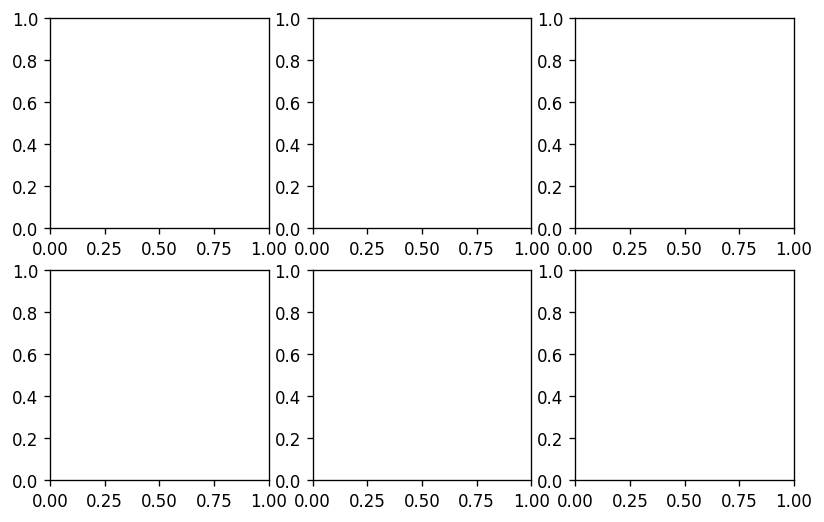

In [12]:
print("-------------Identifying Outliers in Columns-------------")
plt.rcParams["figure.figsize"] = (8,5)
df_list = ['Attendence', 'Phy_marks', 'Che_marks', 'EM1_marks', 'PPS_marks', 'SME_marks']
fig, axes = plt.subplots(2, 3)
fig.set_dpi(120)

In [13]:
count  = 0
for r in range(2):
    for c in range(3):
        _ = df[df_list[count]].plot(kind = 'box', ax=axes[r,c])
        count+=1

In [14]:
plt.show()

In [15]:
print("-------------Removing Outliers from Che_Makrs Column-------------")
q1 = df['Che_marks'].quantile(0.25)
q3 = df['Che_marks'].quantile(0.75)

-------------Removing Outliers from Che_Makrs Column-------------


In [16]:
Lower_limit = q1 - 1.5 * (q3 - q1)
Upper_limit = q3 + 1.5 * (q3 - q1)

In [17]:
print(f'q1 = {q1}, q3 = {q3}, IQR = {q3 -q1}, Lower_limit = {Lower_limit}, Upper_limit = {Upper_limit}')
print(df[(df['Che_marks'] < Lower_limit) | (df['Che_marks'] > Upper_limit)])
print("\n")

q1 = 76.0, q3 = 86.25, IQR = 10.25, Lower_limit = 60.625, Upper_limit = 101.625
    Rollno    Name Gender Branch  Attendence  Phy_marks  Che_marks  EM1_marks  \
7        8  Ishaan      M   ENTC        75.0       66.0       51.0       83.0   
14      15  Maryam      F     IT        64.0       87.0       60.0       90.0   

    PPS_marks  SME_marks  Total Marks  Percentage  
7   69.611111       76.0          345        69.0  
14  65.000000       90.0          392        78.4  




In [18]:
print("=====================Binning (convert into normal distribution)========================\n")
print("------------Gradding According to percentage")

=====================Binning (convert into normal distribution)========================

------------Gradding According to percentage


function for Grading


In [19]:
def BinningFunction(column, cut_points, labels = None) :
    break_points=[column.min()] + cut_points + [column.max( )]
    print('Gradding According to percentage \n<60 = F \n60-70 = B \n70-80 = A\n80-100 = O')
    return pd.cut(column, bins=break_points, labels=labels, include_lowest=True)

In [20]:
cut_points = [60, 70, 80]
labels = ['F', 'B', 'A', 'O']
df['Grade'] = BinningFunction(df['Percentage'], cut_points, labels)
print(df.head(10))
print("\n")

Gradding According to percentage 
<60 = F 
60-70 = B 
70-80 = A
80-100 = O
   Rollno       Name Gender Branch  Attendence  Phy_marks   Che_marks  \
0       1   Mohammed      M   Comp        72.0  62.000000   98.000000   
1       2    Reyansh      M     IT        58.0  62.000000   83.000000   
2       3      Aarav      M     IT        57.0  74.058824  100.000000   
3       4     Atharv      M     IT        60.0  89.000000   83.000000   
4       5     Vivaan      M   Comp        85.0  90.000000   80.764706   
5       6      Advik      M   ENTC        94.0  99.000000   84.000000   
6       7       Ansh      M   ENTC        98.0  88.000000   95.000000   
7       8     Ishaan      M   ENTC        75.0  66.000000   51.000000   
8       9      Dhruv      M   ENTC        63.0  74.058824   80.764706   
9      10  Siddharth      M   ENTC        96.0  67.000000   78.000000   

    EM1_marks  PPS_marks  SME_marks  Total Marks  Percentage Grade  
0   63.000000  89.000000       36.0          348    